# Training a Deep Neural Network
The following code implements a deep neural network of 2 hidden layers with backpropagation using low-level libraries and compares it with a model generated by Scikit-learn.

## 1 Data Loading & Cleaning
The data set contains credit card debt information about 10,000 customers and whether they defaulted or not.

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [2]:
# Loading the data
df = pd.read_csv('Default.csv')
df.head()

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


In [3]:
# Scaling and converting to NumPy arrays
df['default']=df['default'].apply(lambda x: 0 if x=='No' else 1)
df['student']=df['student'].apply(lambda x: 0 if x=='No' else 1)

In [4]:
df.head()

,default,student,balance,income
0,0,0,729.526495,44361.625074
1,0,1,817.180407,12106.134700
2,0,0,1073.549164,31767.138947
3,0,0,529.250605,35704.493935
4,0,0,785.655883,38463.495879


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   default  10000 non-null  int64  
 1   student  10000 non-null  int64  
 2   balance  10000 non-null  float64
 3   income   10000 non-null  float64
dtypes: float64(2), int64(2)
memory usage: 312.6 KB


In [6]:
scaler = StandardScaler()
df[['balance','income']] = scaler.fit_transform(df[['balance','income']])
df

,default,student,balance,income
0,0,0,-0.218835,0.813187
1,0,1,-0.037616,-1.605496
2,0,0,0.492410,-0.131212
3,0,0,-0.632893,0.164031
4,0,0,-0.102791,0.370915
...,...,...,...,...
9995,0,0,-0.255990,1.460366
9996,0,0,-0.160044,-1.039014
9997,0,0,0.020751,1.883565
9998,0,0,1.516742,0.236363


In [7]:
Y = df['default'].to_numpy().reshape(-1,1)
X = df.drop(columns=['default']).to_numpy()

In [8]:
print("Shape of Y:",Y.shape)
print("Shape of X:",X.shape)

Shape of Y: (10000, 1)
Shape of X: (10000, 3)


In [9]:
X = X.T
Y = Y.T

print("Shape of Y:",Y.shape)
print("Shape of X:",X.shape)

Shape of Y: (1, 10000)
Shape of X: (3, 10000)


## 2 Training a Deep Neural Network Using Scikit-learn
The following code trains a deep neural network of 2 hidden layers with 4 neurons in each hidden layer using scikit-learn.

In [10]:
from sklearn.neural_network import MLPClassifier

In [11]:
m = Y.shape[1]
mlp = MLPClassifier(hidden_layer_sizes=(4,4),activation='tanh',solver='sgd',alpha=0,learning_rate_init=0.01,max_iter=2000,batch_size=m,shuffle=False,momentum=0,verbose=True)
mlp.fit(X.T,Y.T)

/home/allen/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1118: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 0.79736584
Iteration 2, loss = 0.78900528
Iteration 3, loss = 0.78079423
Iteration 4, loss = 0.77272940
Iteration 5, loss = 0.76480754
Iteration 6, loss = 0.75702550
Iteration 7, loss = 0.74938021
Iteration 8, loss = 0.74186866
Iteration 9, loss = 0.73448790
Iteration 10, loss = 0.72723506
Iteration 11, loss = 0.72010733
Iteration 12, loss = 0.71310199
Iteration 13, loss = 0.70621635
Iteration 14, loss = 0.69944780
Iteration 15, loss = 0.69279380
Iteration 16, loss = 0.68625186
Iteration 17, loss = 0.67981956
Iteration 18, loss = 0.67349452
Iteration 19, loss = 0.66727442
Iteration 20, loss = 0.66115702
Iteration 21, loss = 0.65514011
Iteration 22, loss = 0.64922154
Iteration 23, loss = 0.64339922
Iteration 24, loss = 0.63767108
Iteration 25, loss = 0.63203515
Iteration 26, loss = 0.62648947
Iteration 27, loss = 0.62103213
Iteration 28, loss = 0.61566128
Iteration 29, loss = 0.61037511
Iteration 30, loss = 0.60517185
Iteration 31, loss = 0.60004979
Iteration 32, los

MLPClassifier(activation='tanh', alpha=0, batch_size=10000,
              hidden_layer_sizes=(4, 4), learning_rate_init=0.01, max_iter=2000,
              momentum=0, shuffle=False, solver='sgd', verbose=True)

In [12]:
print("\nWeights and biases")
print("W1:",mlp.coefs_[0].T)
print("b1:",mlp.intercepts_[0].reshape(-1,1))
print("W2:",mlp.coefs_[1].T)
print("b2:",mlp.intercepts_[1].reshape(-1,1))
print("W3:",mlp.coefs_[2].T)
print("b3:",mlp.intercepts_[2].reshape(-1,1))


Weights and biases
W1: [[-0.48691103  0.91946446 -0.02454228]
 [ 0.47748217  0.42864578 -0.19787191]
 [ 0.40134923  0.14995668  0.00688993]
 [ 0.38780246  0.16899297  0.61408595]]
b1: [[ 0.48443609]
 [ 0.61062761]
 [-0.91729079]
 [ 0.68565068]]
W2: [[ 0.50797165  0.60230345  0.61599612 -0.87787813]
 [-0.42840833  0.49984181  0.98151956 -0.04637781]
 [-0.23230157 -0.6320469   0.35469939 -0.4044402 ]
 [-0.80300057 -0.32756874  0.62673365 -0.31788066]]
b2: [[-0.26892527]
 [-0.37571438]
 [-0.25252441]
 [-0.31019441]]
W3: [[ 0.66006332  0.6855996   0.39696308 -0.12668798]]
b3: [[-1.45236886]]


## 3 Training a Deep Neural Network Using Backpropagation
The following code implements backpropagation to train a deep neural network of 2 hidden layers with 4 neurons in each hidden layer.

In [13]:
# Initialising the paramaters of the neural network with Xavier initialisation
W = [np.random.randn(4,3)*np.sqrt(1/3),np.random.randn(4,4)*np.sqrt(1/4),np.random.randn(1,4)*np.sqrt(1/4)]
b = [np.zeros((4,1)),np.zeros((4,1)),np.zeros((1,1))]

In [14]:
# Updating parameters using gradient descent
iter = 508
lr = 0.01
loss = np.array([])
L = 3

for i in np.arange(iter):
    # Forward propagation
    Z = []
    A = []
    for l in np.arange(L):
        Z.append(W[l]@A[l-1]+b[l] if l> 0 else W[l]@X+b[l])
        A.append(1/(1+np.exp(-Z[l])) if l==L-1 else np.tanh(Z[l]))

    # Back propagation
    dZ = [0]*L
    dA = [0]*L
    dW = [0]*L
    db = [0]*L
    
    for l in np.arange(L-1,-1,-1):
        dZ[l] = A[l]-Y if l==L-1 else dA[l]*(1-np.tanh(Z[l])**2)
        dA[l-1] = W[l].T@dZ[l] if l> 0 else 0
        dW[l] = 1/m*dZ[l]@A[l-1].T if l>0 else 1/m*dZ[l]@X.T
        db[l] = 1/m*np.sum(dZ[l],axis=1,keepdims=True)
        W[l] -= lr*dW[l]
        b[l] -= lr*db[l]

    current_loss = -1/m*(Y@np.log(A[L-1]).T+(1-Y)@np.log(1-A[L-1]).T)
    loss = np.append(loss,current_loss)

print("Last iteration:",i+1)
print("Losses:",loss[-10:])

print("\nWeights and biases")
print("W1:",W[0])
print("b1:",b[0])
print("W2:",W[1])
print("b2:",b[1])
print("W3:",W[2])
print("b3:",b[2])

Last iteration: 508
Losses: [0.17210746 0.17192895 0.17175116 0.17157407 0.17139768 0.17122199
 0.171047   0.17087269 0.17069907 0.17052612]

Weights and biases
W1: [[ 0.42274488 -0.45033552 -0.79540808]
 [ 0.57997555 -0.82170331  0.08461769]
 [ 0.07099727  1.15501132 -0.25181053]
 [ 0.00661883 -0.00602965 -0.04531166]]
b1: [[ 0.00948902]
 [ 0.2175426 ]
 [ 0.09406294]
 [-0.5058794 ]]
W2: [[-0.08367674 -0.90048196 -0.40445887  1.28890518]
 [ 0.65865158  0.20861881 -0.16428688 -0.08435036]
 [ 0.31119039  0.41101153 -0.16052644  0.31454617]
 [ 0.58570103  0.26255889 -0.06516088 -0.98081398]]
b2: [[-0.32328211]
 [-0.2997069 ]
 [ 0.12666848]
 [ 0.24372617]]
W3: [[ 0.89551584  0.36908528 -0.2221427  -0.5839157 ]]
b3: [[-1.00467257]]


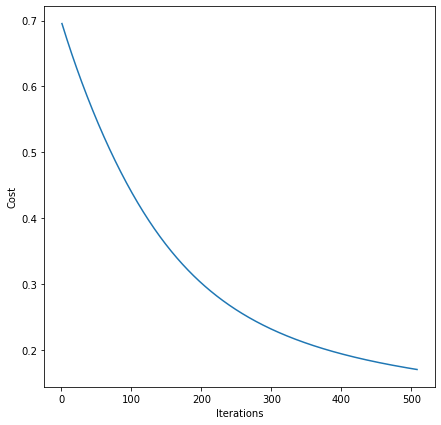

In [15]:
# Plotting the cost function against the number of iterations
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

fig = plt.figure(figsize=[7,7])
ax = fig.add_subplot(1,1,1)
ax.plot(np.arange(iter)+1,loss)
ax.set_ylabel('Cost')
ax.set_xlabel('Iterations')
fig.show()

### Using gradient checking to verify the custom implementation

In [16]:
# Creating the gradient vector of the cost function

def calculate_dtheta(X,Y,W,b,L):
    dtheta = np.array([])

    Z = []
    A = []
    for l in np.arange(L):
        Z.append(W[l]@A[l-1]+b[l] if l> 0 else W[l]@X+b[l])
        A.append(1/(1+np.exp(-Z[l])) if l==L-1 else np.tanh(Z[l]))

    dZ = [0]*L
    dA = [0]*L
    dW = [0]*L
    db = [0]*L
        
    for l in np.arange(L-1,-1,-1):
        dZ[l] = A[l]-Y if l==L-1 else dA[l]*(1-np.tanh(Z[l])**2)
        dA[l-1] = W[l].T@dZ[l] if l> 0 else 0
        dW[l] = 1/m*dZ[l]@A[l-1].T if l>0 else 1/m*dZ[l]@X.T
        db[l] = 1/m*np.sum(dZ[l],axis=1,keepdims=True)
        
    for l in range(L):
        dtheta = np.append(dtheta,dW[l].flatten())
        dtheta = np.append(dtheta,db[l].flatten())
    
    return dtheta

dtheta = calculate_dtheta(X,Y,W,b,L)
dtheta

array([ 0.00117267,  0.00186388, -0.00370942, -0.00223187, -0.00152015,
       -0.0069052 , -0.00088115,  0.00010101, -0.00090408, -0.00014081,
       -0.03007766,  0.01428399, -0.00211325, -0.01976677, -0.00516577,
        0.02516481,  0.00093391,  0.01261441, -0.00686522, -0.00696084,
        0.00382493,  0.01254907, -0.00467193, -0.01068437, -0.00105854,
       -0.00712181,  0.0021668 ,  0.00673445,  0.00300364, -0.01143924,
        0.00478057,  0.01003912,  0.0146153 ,  0.02300793, -0.01437657,
       -0.02082745, -0.06527548, -0.00044569,  0.01929882,  0.05150034,
        0.07307083])

In [17]:
# Creating a list of all parameters
P = b.copy()
for l in range(L):
    P.insert(2*l,W[l])

print(P)

[array([[ 0.42274488, -0.45033552, -0.79540808],
       [ 0.57997555, -0.82170331,  0.08461769],
       [ 0.07099727,  1.15501132, -0.25181053],
       [ 0.00661883, -0.00602965, -0.04531166]]), array([[ 0.00948902],
       [ 0.2175426 ],
       [ 0.09406294],
       [-0.5058794 ]]), array([[-0.08367674, -0.90048196, -0.40445887,  1.28890518],
       [ 0.65865158,  0.20861881, -0.16428688, -0.08435036],
       [ 0.31119039,  0.41101153, -0.16052644,  0.31454617],
       [ 0.58570103,  0.26255889, -0.06516088, -0.98081398]]), array([[-0.32328211],
       [-0.2997069 ],
       [ 0.12666848],
       [ 0.24372617]]), array([[ 0.89551584,  0.36908528, -0.2221427 , -0.5839157 ]]), array([[-1.00467257]])]


In [18]:
# Defining a function to index an element in the list of parameters
def loc(index,P):
    i = 0
    for p in P:
        if index<p.size:
            return i,np.unravel_index(index,p.shape)
        else:
            index -= p.size
            i += 1

loc(10,P)

(0, (3, 1))

In [19]:
# Defining a function to calculate the cost function

def cost(index,epsilon,X,Y,P,L):
    i = loc(index,P)
    P[i[0]][i[1]] += epsilon

    W = [P[i] for i in range(0,L*2,2)]
    b = [P[i] for i in range(1,L*2,2)]

    Z = []
    A = []
    for l in np.arange(L):
        Z.append(W[l]@A[l-1]+b[l] if l> 0 else W[l]@X+b[l])
        A.append(1/(1+np.exp(-Z[l])) if l==L-1 else np.tanh(Z[l]))
    
    P[i[0]][i[1]] -= epsilon
    return -(Y@np.log(A[L-1]).T+(1-Y)@np.log(1-A[L-1]).T)/m

cost(10,1e-7,X,Y,P,L)

array([[0.17035385]])

In [20]:
# Defining a function to calculate the partial derivative of the cost function with respect to a parameter

def partial(index,epsilon,X,Y,P,L):
    return (cost(index,epsilon,X,Y,P,L)-cost(index,-1*epsilon,X,Y,P,L))/(2*epsilon)

In [21]:
# Creating the approximate gradient vector of the cost function

dtheta_approx = np.array([])
for index in range(41):
    dtheta_approx = np.append(dtheta_approx,partial(index,1e-7,X,Y,P,L))

dtheta_approx

array([ 0.00117267,  0.00186388, -0.00370942, -0.00223187, -0.00152015,
       -0.0069052 , -0.00088115,  0.00010101, -0.00090408, -0.00014081,
       -0.03007766,  0.01428399, -0.00211325, -0.01976677, -0.00516577,
        0.02516481,  0.00093391,  0.01261441, -0.00686522, -0.00696085,
        0.00382493,  0.01254907, -0.00467193, -0.01068437, -0.00105854,
       -0.00712181,  0.0021668 ,  0.00673445,  0.00300364, -0.01143924,
        0.00478057,  0.01003912,  0.0146153 ,  0.02300793, -0.01437657,
       -0.02082745, -0.06527548, -0.00044569,  0.01929882,  0.05150034,
        0.07307083])

In [22]:
G = np.linalg.norm(dtheta_approx - dtheta)/(np.linalg.norm(dtheta_approx) + np.linalg.norm(dtheta))
G

4.0900483840911664e-09

## 4 Conclusion
Similar values of loss from 2 & 3 for the same number of iterations and the low value of G from gradient checking indicates that the custom gradient descent implementation is correct. The weights and biases are different because the 2 models are randomly initialised during training and the loss function of the deep neural network has multiple maximia and minima.